In [1]:
from datetime import datetime
print(f'Päivitetty {datetime.now().date()} / Aki Taanila')

Päivitetty 2023-02-25 / Aki Taanila


# Kahden määrällisen muuttujan välinen riippuvuus

Tässä muistiossa käytän **seaborn**-funktioita **scatterplot**, **relplot** ja **pairplot**.

Kaavioiden muotoiluun käytän **matplotlib.pyplot-funktioita**. Jos kaipaat lisää muotoiluja, niin lue https://matplotlib.org/stable/tutorials/introductory/pyplot.html

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Grafiikan tyylimäärittely
sns.set_style('whitegrid')

# Tietoja pingviineistä
penguins = sns.load_dataset('penguins')
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


## Hajontakaavio

Kahden määrällisen muuttujan riippuvuuden voin visualisoida **scatterplot**-kaaviona (hajontakaavio).

**hue**-parametrilla voin lisäksi ottaa mukaan värierottelun kategorisen muuttujan perusteella.

Lue lisää https://seaborn.pydata.org/generated/seaborn.scatterplot.html

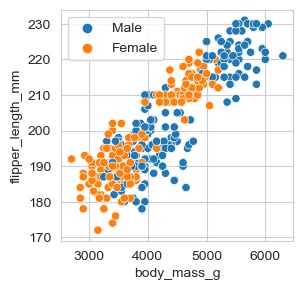

In [3]:
# Pingviinin painon ja siiven pituuden välinen riippuvuus hajontakaaviona
plt.figure(figsize=(3, 3))
sns.scatterplot(data=penguins,  x='body_mass_g', y='flipper_length_mm', hue='sex')

plt.legend()

## relplot

**relplot** mahdollistaa hajontakaavioiden laatimisen kategoristen muuttujien määrittelemissä ryhmissä.

Seuraavassa teen oman hajontakaavion molemmille sukupuolille. Kummassakin hajontakaaviossa on värierottelu lajin mukaan.

Lue lisää https://seaborn.pydata.org/generated/seaborn.relplot.html

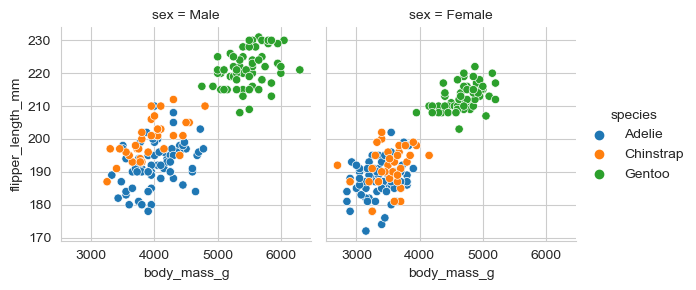

In [4]:
sns.relplot(data=penguins, x='body_mass_g', y='flipper_length_mm', hue='species'
            ,col='sex', height=3)

## pairplot

**pairplot** mahdollistaa useiden muuttujien välisten riippuvuuksien tarkastelun samassa kuviossa. Jos muuttujia on paljon, niin kaavioiden piirtäminen voi kestää jonkin aikaa.

Seuraavassa tarkastelen nokan pituuden, nokan leveyden, siiven pituuden ja painon välisiä riippuvuuksia. Värierottelun (**hue**) ansiosta näen myös eri lajien välisiä eroja.

Lue lisää https://seaborn.pydata.org/generated/seaborn.pairplot.html

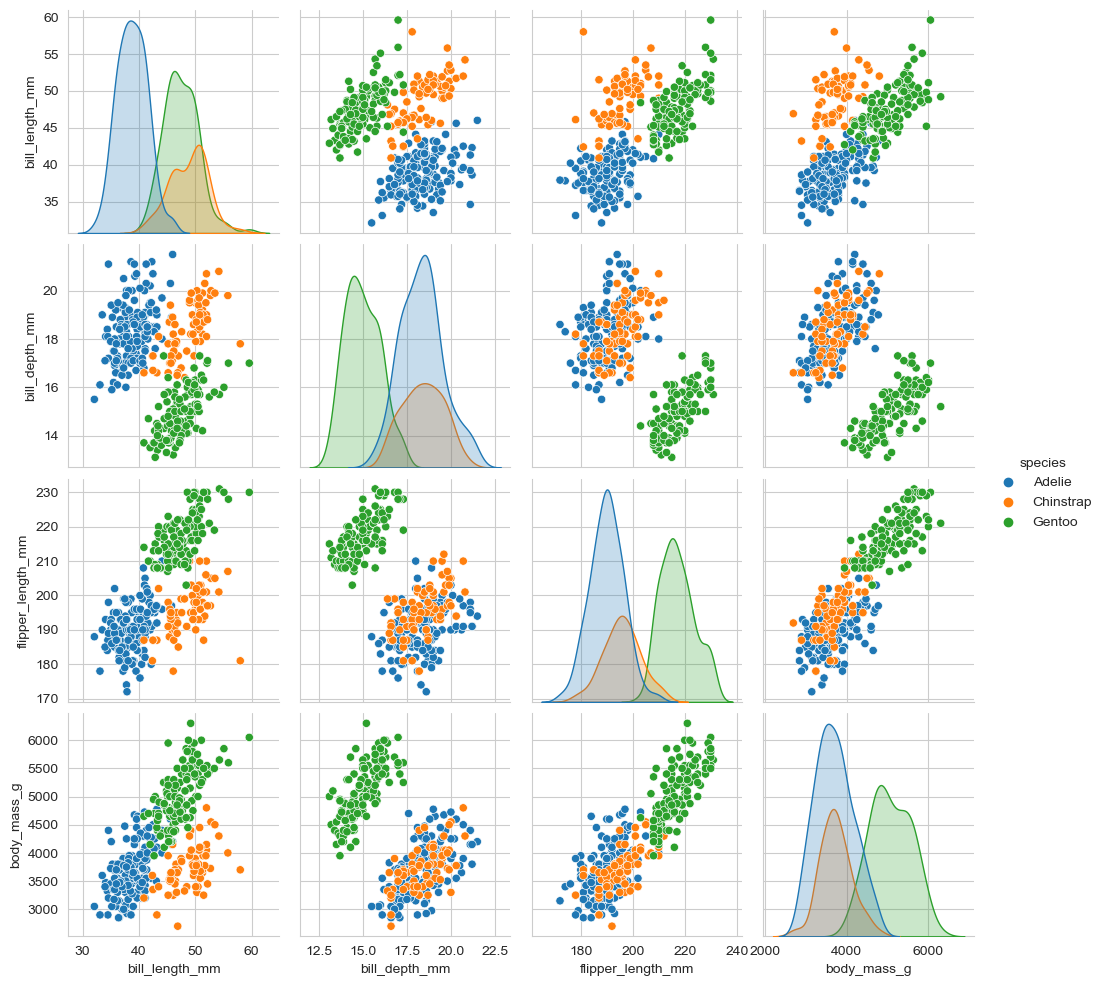

In [5]:
sns.pairplot(data=penguins, hue='species')